##### 11. This exercise makes use of the data in Table 11.4.

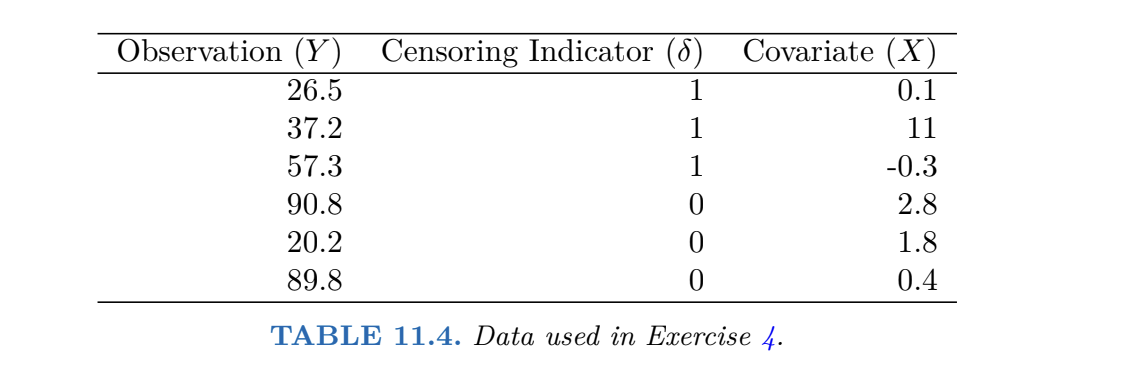

In [1]:
import numpy as np
import pandas as pd

##### (a) Create two groups of observations. In Group 1, X < 2, whereas in Group 2, X ≥ 2. Plot the Kaplan-Meier survival curves corresponding to the two groups. Be sure to label the curves so that it is clear which curve corresponds to which group. By eye, does there appear to be a diference between the two groups’ survival curves?

In [2]:
X = [0.1, 11, -0.3, 2.8, 1.8, 0.4]
censor = [1, 1, 1, 0, 0, 0]
y = [26.5, 37.2, 57.3, 90.8, 20.2, 89.8]

df = pd.DataFrame({'X' : X, 'y' : y, 'censor' : censor})
df

,X,y,censor
0,0.1,26.5,1
1,11.0,37.2,1
2,-0.3,57.3,1
3,2.8,90.8,0
4,1.8,20.2,0
5,0.4,89.8,0


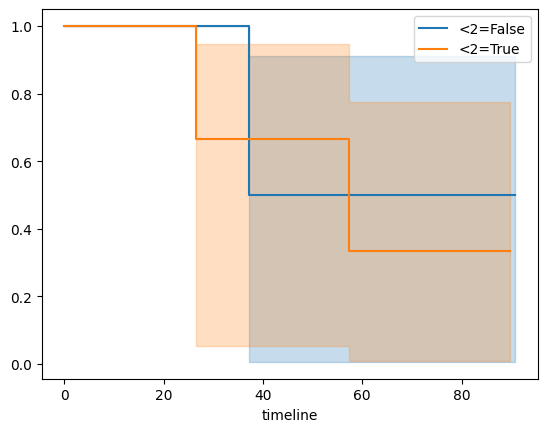

In [10]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter() 
for idx, data in df.groupby(by=df['X'] < 2):
    kmf.fit(data['y'], data['censor'])
    kmf.plot(label=f'<2={idx}')

##### (b) Fit Cox’s proportional hazards model, using the group indicator as a covariate. What is the estimated coefcient? Write a sentence providing the interpretation of this coefcient, in terms of the hazard or the instantaneous probability of the event. Is there evidence that the true coefcient value is non-zero?

In [11]:
df['X[<2]'] = np.where(df['X'] < 2, 1, 0)
df

,X,y,censor,X[<2]
0,0.1,26.5,1,1
1,11.0,37.2,1,0
2,-0.3,57.3,1,1
3,2.8,90.8,0,0
4,1.8,20.2,0,1
5,0.4,89.8,0,1


In [19]:
from lifelines import CoxPHFitter
x = df.drop('X', axis=1)
model = CoxPHFitter().fit(x, 'y', 'censor')
model.summary[['coef', 'p']]

,coef,p
covariate,,
X[<2],0.340143,0.783144


p value is high, there is no significance of X being less than 2.

##### (c) Recall from Section 11.5.2 that in the case of a single binary covariate, the log-rank test statistic should be identical to the score statistic for the Cox model. Conduct a log-rank test to determine whether there is a diference between the survival curves for the two groups. How does the p-value for the log-rank test statistic compare to the p-value for the score statistic for the Cox model from (b)?

In [25]:
df.where(df['X[<2]'] == 0).dropna()

,X,y,censor,X[<2]
0,0.1,26.5,1.0,1.0
2,-0.3,57.3,1.0,1.0
4,1.8,20.2,0.0,1.0
5,0.4,89.8,0.0,1.0


In [26]:
from lifelines.statistics import logrank_test
logrank_test(df.where(df['X[<2]'] == 1).dropna()['y'], df.where(df['X[<2]'] == 0).dropna()['y'],
             df.where(df['X[<2]'] == 1).dropna()['censor'], df.where(df['X[<2]'] == 0).dropna()['censor'])

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.08 0.78      0.35

same p value